In [1]:
%matplotlib inline
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt 

import theano
from theano import tensor as T, function

from IPython import display
import time

In [2]:
noise_var = .5 

n_samples = 1000

n = np.random.normal(0,noise_var,n_samples)
x = np.arange(n_samples)

x = (x - x.mean()) / x.std() # input standatization 
w, b = np.random.rand(2)

d = w*x  +  b  
y = d + n 


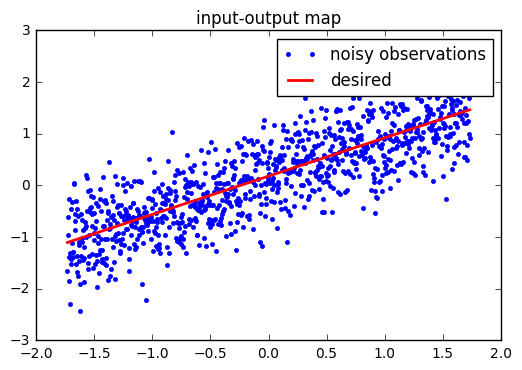

In [3]:
plt.plot(x,y,'.')
plt.plot(x,d,'-r',linewidth= 2)
plt.legend(('noisy observations', 'desired'))
plt.title('input-output map')

In [26]:
X,Y = T.vectors('input','desired')
W = theano.shared(.01)
B = theano.shared(0.)
Z = W*X + B

Cost = ((Y-Z)**2).mean()  # cost is the mean squared value
params = [W,B]  # params that should be learned


0.01


In [5]:
W.get_value()

array(0.01)

In [6]:
W

<TensorType(float64, scalar)>

In [7]:
updates = ((W,W*2), )
double_w = function([],[],updates=updates)

In [8]:
double_w()
W.get_value()

array(0.02)

In [29]:
lr = .1 
grads = [T.grad(Cost, p) for p in params]
updates = [(p,p-lr*g) for p,g in zip(params,grads)]


AttributeError: 'list' object has no attribute 'get_value'

In [10]:
train = function([X,Y],Cost ,updates=updates)



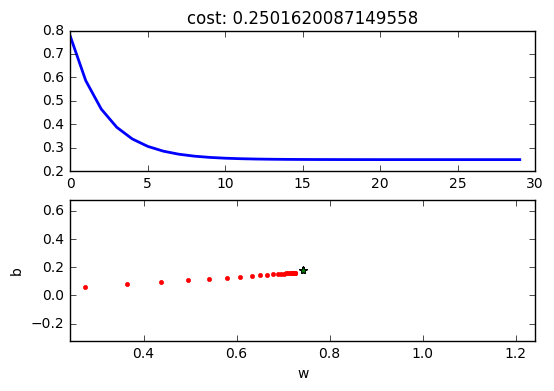

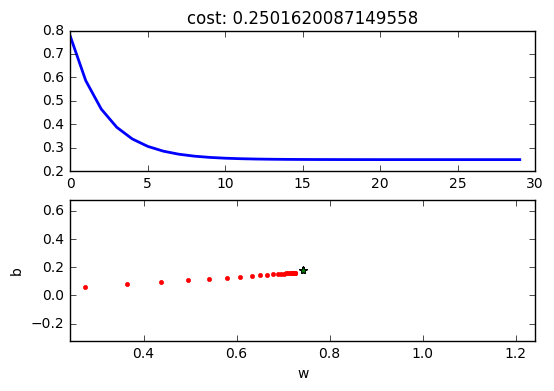

In [11]:
epochs = 30 
final_cost = []

for i in range(epochs):
    final_cost.append(train(x,y))
    what, bhat = W.get_value(),B.get_value()
    
    #cost function
    plt.subplot(211)
    plt.cla()
    plt.title('cost: {}'.format(final_cost[-1]))
    plt.plot(final_cost,linewidth=2.)
    
    #param space
    plt.subplot(212)
    plt.plot(w,b,'*',linewidth=2.)
    plt.plot(what,bhat,'.r',linewidth=2.)
    plt.xlim([w-.5, w+.5])
    plt.ylim([b-.5, b+.5])
    plt.xlabel('w')
    plt.ylabel('b')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)

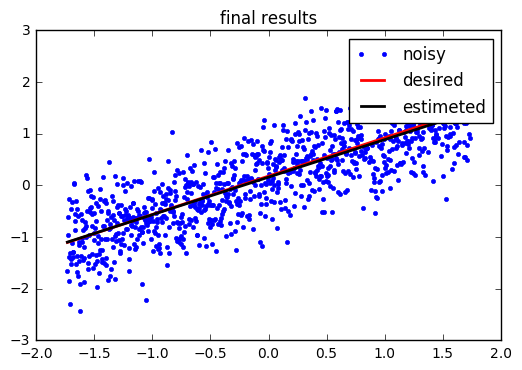

In [27]:
plt.title('final results')
plt.plot(x,y,'.')
plt.plot(x,d,'r',linewidth=2.)
plt.plot(x,what*x+bhat,'k',linewidth=2 )
plt.legend(('noisy','desired','estimeted'))         